# **Iowa Liquor - Análise Exploratória de Dados**

Em 1920 foi instituida a lei seca nos Estados Unidos, onde era proibida a fabricação, importação, venda ou transporte de bebidas alcoólicas dentro do país, ou de países sujeitos a sua jurisdição. O objetivo primordial dessa lei era o combate à pobreza e violência. Passados 13 anos a lei foi revogada, pois não gerou os resultados esperados.

Esse evento ficou marcado como um símbolo da relação dos Estados Unidos com o consumo de álcool. Segundo o CDC (Center for Disease Control and Prevention), [um em cada seis adultos faz consumo execissivo de álcool no país](https://www.cdc.gov/alcohol/fact-sheets/binge-drinking.htm). Esse dado demonstra um grave problema de saúde que afeta, principalmente, a população de jovens adultos (18 à 34 anos). Além disso, demonstra-se, como um mercado lucrativo e que necessita de atenção por parte de organizações, sobre o comportamento de consumo e quais ações devem ser tomadas contra o desenvolvimento da dependência em álcool.

## **Dados Utilizados**

O dataset que será utilizado na análise trata sobre as vendas de destilados do tipo liquor de classe "E" no estado de Iowa, fornecido pela plataforma de open data do estado de Iowa, e pode ser obtido [clicando aqui](https://data.iowa.gov/Sales-Distribution/Iowa-Liquor-Sales/m3tr-qhgy). O período de tempo utilizado na análise está entre janeiro de 2012 e março de 2023.

O objetivo principal da análise será realizar um estudo sobre o consumo de destilados no estado de Iowa, no decorrer dos anos. Para isso serão utilizadas perguntas norteadoras, que ajudarão a compreender melhor o consumo da bebida no decorrer dos anos.

### **Atribuição**

**[Iowa Liquor Sales](https://data.iowa.gov/Sales-Distribution/Iowa-Liquor-Sales/m3tr-qhgy) by Iowa Department of Commerce, Alcoholic Beverages Division. The data is dedicated to the public domain under CC0.**

## **Perguntas Norteadoras**

* Qual a quantidade total de lojas?
* Qual cidade possui mais lojas de bebidas licenciadas, que realizaram compras?
* Quais são os 10 produtos vendidos mais caros?
* Qual o fornecedor que mais vendeu em todo o período? E quais foram os fornecedores que mais venderam nos últimos 10 meses por mês?
* Qual a categoria mais vendida por volume total no período? E por quantidade de vendas realizadas?
* Qual o produto mais vendido por condado?
* Qual a loja que mais transacionou em volume monetário? E por quantidade de vendas? E por litros?
* Qual o produto que mais gerou receita para ABD no período? E qual o produto que mais possui margem de lucro?
* Parece haver sazionalidade na venda de bebidas? Algum mês do ano, no decorrer dos anos, possui mais destaque no volume vendido?
* Qual é o total vendido por ano?
* Qual foi o lucro por ano?
* Qual foi a evolução do comportamento de consumo?

## **Análise Exploratória**

### **Carregando Pacotes e Funções**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import matplotlib
import datetime
import wget
import os

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

In [2]:
from platform import python_version
print("Versão Python utilizada:", python_version())

Versão Python utilizada: 3.11.3


In [3]:
import watermark.watermark as watermark
%load_ext watermark

In [4]:
%watermark --iversions

matplotlib: 3.7.1
pandas    : 2.0.3
numpy     : 1.24.4
wget      : 3.2



### **Carregando o Dataset**

O arquivo csv em questão possui cerca de 6,4 GB. Será feito um trabalho de pré-processamento, alterando o formato dos dados e realizando seleção de colunas, tendo em vista que o espaço ocupado em memória ao carregar, sem alterações, é de cerca de 23 GB. Isso permitirá maior eficácia na realização de operações no decorrer da análise. É esperado que o dataset ocupe cerca de 6 GB com as alterações realizadas no formato do dados e seleção de colunas.

Toda a selação de variáveis será feita com base no dicionário de dados, disponível na fonte de dados. Colunas serão excluidas por não possuirem serventia para a análise, excesso de valores nulos, ou por redundância de variáveis no dataset.

In [5]:
if os.path.exists('./Iowa_Liquor_Sales.csv'):
    pass
else:
    wget.download('https://data.iowa.gov/api/views/m3tr-qhgy/rows.csv?accessType=DOWNLOAD&bom=true&format=true')

In [6]:
dados = pd.read_csv('Iowa_Liquor_Sales.csv', 
                    engine = 'pyarrow',
                    usecols = ['Date', 'Store Number', 'Store Name', 'City', 'County', 'Category Name',
                               'Vendor Number', 'Vendor Name', 'Item Number', 'Item Description', 'Bottle Volume (ml)',
                               'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold', 'Sale (Dollars)',
                               'Volume Sold (Liters)'],
                    dtype = {'Store Number' : 'category', 'Vendor Number' : 'float16', 'Category Name' : 'category',
                             'Bottle Volume (ml)' : 'int32', 'State Bottle Cost' : 'float16', 'State Bottle Retail' : 'float16',
                             'Bottles Sold' : 'int16', 'Sale (Dollars)' : 'float32', 'Volume Sold (Liters)' : 'float16',
                             'City' : 'category', 'County' : 'category', 'Vendor Name' : 'category', 'Item Description' : 'category'})

In [7]:
dados.head()

,Date,Store Number,Store Name,City,County,Category Name,Vendor Number,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters)
0,02/16/2016,4167,"IOWA STREET MARKET, INC.",DUBUQUE,DUBUQUE,AMERICAN GRAPE BRANDIES,85.00,BROWN-FORMAN CORPORATION,52806,KORBEL BRANDY,750,6.66,9.99,12,119.88,9.00
1,02/16/2016,2656,HY-VEE FOOD STORE / CORNING,CORNING,CLAYTON,WHISKEY LIQUEUR,85.00,BROWN-FORMAN CORPORATION,86886,SOUTHERN COMFORT,750,10.33,15.50,12,186.00,9.00
2,02/22/2016,4418,KUM & GO #46 / WALNUT,WALNUT,POTTAWATTAMIE,VODKA 80 PROOF,434.00,LUXCO-ST LOUIS,36308,HAWKEYE VODKA,1750,7.17,10.76,12,129.12,21.00
3,02/10/2016,2623,HY-VEE FOOD STORE #4 / SIOUX CITY,SIOUX CITY,WOODBURY,VODKA FLAVORED,380.00,PHILLIPS BEVERAGE COMPANY,41857,UV CHERRY RED VODKA MINI,500,4.89,7.34,1,7.34,0.50
4,02/22/2016,2627,HY-VEE WINE AND SPIRITS #1,DES MOINES,POLK,IMPORTED GRAPE BRANDIES,389.00,REMY COINTREAU USA .,66295,REMY MARTIN V,200,5.42,8.13,4,32.52,0.80


In [8]:
dados.shape

(26359555, 16)

In [9]:
dados.dtypes

Date                      object
Store Number            category
Store Name                object
City                    category
County                  category
Category Name           category
Vendor Number            float16
Vendor Name             category
Item Number               object
Item Description        category
Bottle Volume (ml)         int32
State Bottle Cost        float16
State Bottle Retail      float16
Bottles Sold               int16
Sale (Dollars)           float32
Volume Sold (Liters)     float16
dtype: object

## **Preparação dos Dados**

A maior parte das colunas possuem espaços no nome. Isso pode representar um problema, dependendo da sintaxe e operação utilizada. Portanto, será necessário ajustar esse eventual problema.

In [10]:
dataset_inicial = dados.copy()

In [11]:
dados.columns = dados.columns.str.replace(' ', '')

In [12]:
list(dados.columns)

['Date',
 'StoreNumber',
 'StoreName',
 'City',
 'County',
 'CategoryName',
 'VendorNumber',
 'VendorName',
 'ItemNumber',
 'ItemDescription',
 'BottleVolume(ml)',
 'StateBottleCost',
 'StateBottleRetail',
 'BottlesSold',
 'Sale(Dollars)',
 'VolumeSold(Liters)']

A coluna `Date` está no formato object, é preciso realizar a conversão, pois será necessária a utilização da data para responder algumas perguntas.

In [13]:
dados['Date'] = pd.to_datetime(dados['Date'], format = '%m/%d/%Y', dayfirst = False)

In [14]:
dados.dtypes

Date                  datetime64[ns]
StoreNumber                 category
StoreName                     object
City                        category
County                      category
CategoryName                category
VendorNumber                 float16
VendorName                  category
ItemNumber                    object
ItemDescription             category
BottleVolume(ml)               int32
StateBottleCost              float16
StateBottleRetail            float16
BottlesSold                    int16
Sale(Dollars)                float32
VolumeSold(Liters)           float16
dtype: object

In [15]:
# Realizando slice nos dados, para abranger apenas o período de tempo definido inicialmente
# Isso evita resultados diferentes para a análise, caso o script seja executado em uma data diferente
dados = dados.query("Date <= '2023-04-30'")

In [16]:
dados.isna().sum()

Date                   0
StoreNumber            0
StoreName              0
City                   0
County                 0
CategoryName           0
VendorNumber           9
VendorName             0
ItemNumber             0
ItemDescription        0
BottleVolume(ml)       0
StateBottleCost       10
StateBottleRetail     10
BottlesSold            0
Sale(Dollars)         10
VolumeSold(Liters)     0
dtype: int64

As colunas `StateBottleCost` e `StateBottleRetail` possuem poucos valores faltantes, seria possível tentar utilizar uma abordagem de analisar demais colunas que possuem o mesmo produto vendedio, em uma data próxima, e realizar o cálculo. No entanto, por quase não possuirem impacto para análise, a exclusão das linhas pode ser dada como a abordagem mais sensata.

In [17]:
dados = dados[(dados['StateBottleCost'].notna()) & (dados['StateBottleRetail'].notna())]

In [18]:
dados.isna().sum()

Date                  0
StoreNumber           0
StoreName             0
City                  0
County                0
CategoryName          0
VendorNumber          9
VendorName            0
ItemNumber            0
ItemDescription       0
BottleVolume(ml)      0
StateBottleCost       0
StateBottleRetail     0
BottlesSold           0
Sale(Dollars)         0
VolumeSold(Liters)    0
dtype: int64

In [19]:
dados.shape

(26359545, 16)

Algumas linhas apresentam valores negativos para o volume vendido, como a fonte informa que o dataset se trata de compra e venda, e não fornece qualquer informação referente a devoluções, será assumido que os dados foram erroneamente inseridos necessitando de transformação. A medida mais correta a ser tomada em um cenário real e de mercado de trabalho, seria entrar em contato com a área que gerou os dados, ou o responsável pelas vendas, para que haja certeza sobre tal situação.

In [20]:
dados[dados['BottlesSold'] < 0].head(5)

,Date,StoreNumber,StoreName,City,County,CategoryName,VendorNumber,VendorName,ItemNumber,ItemDescription,BottleVolume(ml),StateBottleCost,StateBottleRetail,BottlesSold,Sale(Dollars),VolumeSold(Liters)
1571184,2023-04-06,3524,SAM'S CLUB 6568 / AMES,AMES,STORY,CREAM LIQUEURS,300.00,MCCORMICK DISTILLING CO.,65199,TEQUILA ROSE LIQUEUR,1000,13.50,20.25,-1,-20.25,-1.00
1571322,2023-04-27,2603,HY-VEE WINE AND SPIRITS / BETTENDORF,BETTENDORF,SCOTT,100% AGAVE TEQUILA,65.00,JIM BEAM BRANDS,89846,TRES GENERACIONES ANEJO,750,26.50,39.75,-12,-477.00,-9.00
1571543,2023-04-24,2605,HY-VEE DRUGSTORE #5 / CEDAR RAPIDS,CEDAR RAPIDS,LINN,AMERICAN DRY GINS,434.00,LUXCO INC,31658,PARAMOUNT GIN,1750,7.75,11.63,-6,-69.78,-10.50
1571550,2023-04-03,3420,SAM'S CLUB 6344 / WINDSOR HEIGHTS,WINDSOR HEIGHTS,POLK,AMERICAN SCHNAPPS,65.00,JIM BEAM BRANDS,82847,DEKUYPER LUSCIOUS PEACHTREE,1000,7.87,11.81,-12,-141.72,-12.00
1571601,2023-04-10,2633,HY-VEE #3 / BDI / DES MOINES,DES MOINES,POLK,AMERICAN SCHNAPPS,65.00,JIM BEAM BRANDS,82627,DEKUYPER CHERRY PUCKER,1000,7.87,11.81,-12,-141.72,-12.00


In [21]:
dados[['BottlesSold', 'Sale(Dollars)', 'VolumeSold(Liters)']] = dados[['BottlesSold', 'Sale(Dollars)', 'VolumeSold(Liters)']].abs()

Uma vez que não foram identificados maiores problemas nos dados, podemos continuar a análise

## **Análise Exploratória Aprofundada (Respondendo Perguntas Norteadoras)**

### **Qual a quantidade total de lojas?**

In [22]:
dados['StoreNumber'] = dados['StoreNumber'].astype('object')

In [23]:
dados['StoreNumber'].nunique()

2921

Há 2921 lojas diferentes credenciadas, que realizaram compras, ao longo tempo.

### **Qual cidade possui mais lojas de bebidas licenciadas, que realizaram compras?**

In [24]:
dados.groupby('City').StoreNumber.nunique().sort_values(ascending = False).head(5)

City
DES MOINES      144
CEDAR RAPIDS    143
                133
WATERLOO         95
DAVENPORT        89
Name: StoreNumber, dtype: int64

O resultado pode não ser preciso, pois é possível perceber uma categoria em branco para a coluna Cidade. Este é um problema contornável, ao menos em sua maior parte, mas será necessário realizar a reposição de valores, dependendo da quantidade de dados faltantes.

In [25]:
dados[dados['City'] == ''].head(5)

,Date,StoreNumber,StoreName,City,County,CategoryName,VendorNumber,VendorName,ItemNumber,ItemDescription,BottleVolume(ml),StateBottleCost,StateBottleRetail,BottlesSold,Sale(Dollars),VolumeSold(Liters)
283622,2019-08-23,2693,HY-VEE FAST & FRESH EXPRESS- CRESTON,,,IMPORTED CORDIALS & LIQUEURS,192.00,"MAST-JAGERMEISTER US, INC",65251,JAGERMEISTER LIQUEUR MINI,50,29.53,44.31,5,221.50,0.25
288613,2019-08-23,2693,HY-VEE FAST & FRESH EXPRESS- CRESTON,,,CANADIAN WHISKIES,115.00,CONSTELLATION BRANDS INC,11771,BLACK VELVET MINI,50,6.80,10.20,10,102.00,0.50
293379,2019-08-23,2693,HY-VEE FAST & FRESH EXPRESS- CRESTON,,,CANADIAN WHISKIES,115.00,CONSTELLATION BRANDS INC,11786,BLACK VELVET TRAVELER,750,5.23,7.85,3,23.55,2.25
294304,2019-08-23,2693,HY-VEE FAST & FRESH EXPRESS- CRESTON,,,CREAM LIQUEURS,305.00,MHW LTD,73052,RUMCHATA,375,7.00,10.50,4,42.00,1.50
295789,2019-08-23,2693,HY-VEE FAST & FRESH EXPRESS- CRESTON,,,IMPORTED DRY GINS,260.00,DIAGEO AMERICAS,28865,TANQUERAY GIN,375,6.99,10.49,4,41.96,1.50


In [26]:
len(dados[dados['City'] == ''])

82687

Há 82626 linhas sem informações sobre a localização do estabelecimento. No entanto, um estabelecimento pode realizar mais de uma compra, então é possível recuperar a informação com um mínimo de fidelidade, caso ela exista em uma outra compra realizada.

In [27]:
loja_endereco = dados[['StoreNumber', 'City', 'County']]

In [28]:
loja_endereco = loja_endereco[loja_endereco['City'] != '']
loja_endereco.drop_duplicates(subset = 'StoreNumber', inplace = True)

In [29]:
loja_endereco

,StoreNumber,City,County
0,4167,DUBUQUE,DUBUQUE
1,2656,CORNING,CLAYTON
2,4418,WALNUT,POTTAWATTAMIE
3,2623,SIOUX CITY,WOODBURY
4,2627,DES MOINES,POLK
...,...,...,...
17216258,5016,CEDAR RAPIDS,LINN
17327974,4965,STORM LAKE,BUENA VISTA
17447773,4314,FONTANELLE,ADAIR
19522206,9014,HOLSTEIN,IDA


In [30]:
dados.drop(['City', 'County'], axis = 1, inplace = True)

In [31]:
dados = dados.merge(loja_endereco, how = 'left', on = 'StoreNumber')

In [32]:
del(loja_endereco)

In [33]:
dados.groupby('City').StoreNumber.nunique().sort_values(ascending = False).head(5)

City
DES MOINES        144
CEDAR RAPIDS      143
WATERLOO           95
DAVENPORT          89
COUNCIL BLUFFS     75
Name: StoreNumber, dtype: int64

Des Moines é a cidade que mais possui lojas de bebidas, com 144 lojas. Seguida de Cedar Rapids e Waterloo com 142 e 95 lojas, respectivamente.

### **Quais são os 10 produtos vendidos mais caros?**

Há diversas abordagens para determinar quais são os produtos mais caros.

O produto mais caro pode ser determinado pelo preço da garrafa ao Alcoholic Beverages Division (ABD), indicado pela coluna `StateBottleCost`. Ou ao estabelecimento, indicado pela coluna `StateBottleRetail`. 
No entanto, o valor apresentado nas colunas que indicam o preço para a ABD e o estabelecimento, nem sempre estão estabelecidos com base no volume real da garrafa. É possível perceber que existem valores próximos a 190 litros (189000 ml) para cada garrafa.

Ou seja, a alternativa mais sensata é determinar o preço por litro do destilado, utilizando a coluna `VolumeSold(Liters)`.

Há 10 linhas em que o volume vendido em litros (`VolumeSold(Liters)`), consta o valor 0, e as demais colunas que podem auxiliar a encontrar o valor (`BottleVolume(ml)`, `VolumeSold(Gallons)`), também constam o valor 0. Isso, aparentemente, ocorreu pela inserção errada do número do produto no momento da venda. Como o volume de casos é pequeno, prosseguir com a deleção das linhas não gerará impacto relevante no resultado final da análise.

In [34]:
len(dados[dados['VolumeSold(Liters)'] == 0])

10

In [35]:
dados = dados[dados['VolumeSold(Liters)'] != 0]

Segundo o dicionário de dados, a coluna `ItemNumber` se trata de um código identificador único para cada produto, podendo então ser utilizado para refinar os resultados e tornar eles mais apresentáveis.

Além disso, em algumas situações, estão designados o número da loja junto a descrição do produto, como é o caso do item `CEDAR RIDGE PORT CASK FINISH BARREL #2590`, os ajustes serão realizados no dataset dados, posteriormente será gerado um novo dataset para responder a pergunta.

In [36]:
dados['ItemDescription'] = dados['ItemDescription'].str.rsplit(' #', n = 1).str.get(0).astype('category')

In [37]:
preco_produto = dados[['ItemNumber', 'ItemDescription', 'VolumeSold(Liters)', 'StateBottleRetail']].copy()

In [38]:
preco_produto.loc[:, 'price/liter'] = round(((preco_produto['StateBottleRetail'].div(preco_produto['VolumeSold(Liters)'].values, axis = 'index')).iloc[:]))

In [39]:
top_10_litro_preco = preco_produto.sort_values('price/liter', ascending = False).drop_duplicates('ItemNumber').drop_duplicates('ItemDescription')[['ItemNumber', 'ItemDescription', 'price/liter']]
top_10_litro_preco.index = np.arange(1, len(top_10_litro_preco) + 1)

In [40]:
top_10_litro_preco.head(10)

,ItemNumber,ItemDescription,price/liter
1,906540,GLENGOYNE SINGLE MALT SCOTCH 50YR DECANTER,36864.00
2,927849,CEDAR RIDGE RESERVE BOURBON PRIVATE CASK DNO,15360.00
3,987087,CEDAR RIDGE PORT CASK FINISH BARREL,12000.00
4,927368,CEDAR RIDGE BARREL PROOF BOURBON - USE CODE 92...,11608.00
5,987088,CEDAR RIDGE BARREL PROOF BOURBON BARREL,11608.00
6,990029,TEQUILA 3 AMIGOS BLANCO MINI,7068.00
7,48725,REMY MARTIN LOUIS XIII,4596.00
8,85835,TEQUILA PADRE AZUL ANEJO MINI,4592.00
9,905832,HA PORT ELLEN 37YR,4500.00
10,985746,HA CODIGO 1530 TEQUILA EXTRA ANEJO 14 YEARS W/...,4400.00


In [41]:
del(top_10_litro_preco, preco_produto)

### **Qual o fornecedor que mais vendeu em todo o período? E quais foram os fornecedores que mais venderam nos últimos 10 meses por mês?**

A quantidade de valores únicos para `VendorName` e `VendorNumber` é diferente, tendo mais valores em `VendorName`. O que pode ser um indicio de mudança de nome do fornecedor, ou unidades de uma rede. Dessa forma, a coluna `VendorNumber` é a informação mais confiável.

In [42]:
maior_fornecedor = dados[dados['VendorNumber'] == dados['VendorNumber'].value_counts().index[0]].drop_duplicates('VendorNumber')[['VendorNumber', 'VendorName']]
maior_fornecedor['qtd_vendida'] = dados['VendorNumber'].value_counts().max()
maior_fornecedor['StateBottleCost_total'] = dados[dados['VendorNumber'] == dados['VendorNumber'].value_counts().index[0]][['StateBottleCost']].astype('float').sum()[0]
maior_fornecedor['StateBottleRetail_total'] = dados[dados['VendorNumber'] == dados['VendorNumber'].value_counts().index[0]][['StateBottleRetail']].astype('float').sum()[0]

In [43]:
maior_fornecedor

,VendorNumber,VendorName,qtd_vendida,StateBottleCost_total,StateBottleRetail_total
9,260.00,DIAGEO AMERICAS,4355663,54841095.43,82284915.82


DIAGEO AMERICAS foi o fornecedor que mais vendeu, identificado pelo `VendorNumber` 260, com 4.325.813 vendas.

In [44]:
del(maior_fornecedor)

In [45]:
ultimos_10_meses = dados[['Date', 'VendorNumber', 'VendorName', 'StateBottleCost', 'StateBottleRetail']].copy()

O último mês apresentado no dataset, nada data de análise, é o mês de março. Logo, será necessário considerar apenas os 10 meses anteriores, incluindo março.

In [46]:
ultimos_10_meses['Date'].max()

Timestamp('2023-04-28 00:00:00')

In [47]:
ultimos_10_meses['mes'] = pd.DatetimeIndex(ultimos_10_meses['Date']).month

In [48]:
ultimos_10_meses = ultimos_10_meses[ultimos_10_meses['Date'] >= pd.Timestamp(2022, 7, 1)]

In [49]:
ultimos_10_meses.drop('Date', axis = 1, inplace = True)

In [50]:
# Criação de um counter irá facilitar a realização do cálculo de agregação necessário
ultimos_10_meses.loc[:, 'counter'] = 1

In [51]:
ultimos_10_meses = ultimos_10_meses.astype({'StateBottleCost' : 'float', 'StateBottleRetail' : 'float', 'VendorNumber' : 'object'})

In [52]:
ultimos_10_meses.groupby(['VendorNumber', 'VendorName', 'mes']).sum().reset_index(drop = False).sort_values(['mes', 'counter'], ascending = False).drop_duplicates(['mes'])

,VendorNumber,VendorName,mes,StateBottleCost,StateBottleRetail,counter
507269,421.00,SAZERAC COMPANY INC,12,478463.98,717704.70,41483
507268,421.00,SAZERAC COMPANY INC,11,405661.83,608481.13,37057
507267,421.00,SAZERAC COMPANY INC,10,430761.56,646125.76,36734
507266,421.00,SAZERAC COMPANY INC,9,423879.44,635801.16,37181
507265,421.00,SAZERAC COMPANY INC,8,430199.66,645307.08,38212
255664,260.00,DIAGEO AMERICAS,7,493472.29,740331.42,33853
507263,421.00,SAZERAC COMPANY INC,4,344051.79,516069.10,34182
507262,421.00,SAZERAC COMPANY INC,3,394575.86,591852.00,38376
507261,421.00,SAZERAC COMPANY INC,2,334474.62,501707.80,32952
507260,421.00,SAZERAC COMPANY INC,1,409359.08,614036.65,37919


In [53]:
del(ultimos_10_meses)

### **Qual a categoria mais vendida por volume total no período? E por quantidade de vendas realizadas?**

In [54]:
dados.head(5)

,Date,StoreNumber,StoreName,CategoryName,VendorNumber,VendorName,ItemNumber,ItemDescription,BottleVolume(ml),StateBottleCost,StateBottleRetail,BottlesSold,Sale(Dollars),VolumeSold(Liters),City,County
0,2016-02-16,4167,"IOWA STREET MARKET, INC.",AMERICAN GRAPE BRANDIES,85.00,BROWN-FORMAN CORPORATION,52806,KORBEL BRANDY,750,6.66,9.99,12,119.88,9.00,DUBUQUE,DUBUQUE
1,2016-02-16,2656,HY-VEE FOOD STORE / CORNING,WHISKEY LIQUEUR,85.00,BROWN-FORMAN CORPORATION,86886,SOUTHERN COMFORT,750,10.33,15.50,12,186.00,9.00,CORNING,CLAYTON
2,2016-02-22,4418,KUM & GO #46 / WALNUT,VODKA 80 PROOF,434.00,LUXCO-ST LOUIS,36308,HAWKEYE VODKA,1750,7.17,10.76,12,129.12,21.00,WALNUT,POTTAWATTAMIE
3,2016-02-10,2623,HY-VEE FOOD STORE #4 / SIOUX CITY,VODKA FLAVORED,380.00,PHILLIPS BEVERAGE COMPANY,41857,UV CHERRY RED VODKA MINI,500,4.89,7.34,1,7.34,0.50,SIOUX CITY,WOODBURY
4,2016-02-22,2627,HY-VEE WINE AND SPIRITS #1,IMPORTED GRAPE BRANDIES,389.00,REMY COINTREAU USA .,66295,REMY MARTIN V,200,5.42,8.13,4,32.52,0.80,DES MOINES,POLK


In [55]:
dados[['CategoryName', 'VolumeSold(Liters)', 'Sale(Dollars)']].groupby('CategoryName').sum().sort_values('Sale(Dollars)', ascending = False).head(5)

,VolumeSold(Liters),Sale(Dollars)
CategoryName,,
CANADIAN WHISKIES,31215840.00,443418624.00
AMERICAN VODKAS,35287520.00,361934624.00
SPICED RUM,16151571.00,248878864.00
STRAIGHT BOURBON WHISKIES,11355365.00,248392880.00
WHISKEY LIQUEUR,10278731.00,192860848.00


In [56]:
dados[['CategoryName', 'VolumeSold(Liters)', 'Sale(Dollars)']].groupby('CategoryName').sum().sort_values('VolumeSold(Liters)', ascending = False).head(5)

,VolumeSold(Liters),Sale(Dollars)
CategoryName,,
AMERICAN VODKAS,35287520.00,361934624.00
CANADIAN WHISKIES,31215840.00,443418624.00
VODKA 80 PROOF,17797438.00,145764896.00
SPICED RUM,16151571.00,248878864.00
STRAIGHT BOURBON WHISKIES,11355365.00,248392880.00


In [57]:
dados['CategoryName'].value_counts().head(5)

CategoryName
CANADIAN WHISKIES            2520035
AMERICAN VODKAS              2474453
STRAIGHT BOURBON WHISKIES    1653356
SPICED RUM                   1294178
VODKA 80 PROOF               1265967
Name: count, dtype: int64

A categoria de produto mais vendida tanto em valor monetário, quanto em quantidade de vendas no período foram Whiskies Canadenses. Porém, em volume de litros total, Vodkas Americanas foram as mais vendidas em todo o período.

### **Qual o produto mais vendido por condado?**

In [58]:
dados[['BottlesSold', 'County', 'ItemDescription']].groupby(['County', 'ItemDescription']).sum().reset_index().sort_values('BottlesSold', ascending = False).drop_duplicates('County').reset_index(drop = True).head(10)

,County,ItemDescription,BottlesSold
0,POLK,FIREBALL CINNAMON WHISKEY,3806467
1,LINN,FIREBALL CINNAMON WHISKEY,1279824
2,SCOTT,FIREBALL CINNAMON WHISKEY,1107763
3,POTTAWATTAMIE,FIREBALL CINNAMON WHISKEY,769494
4,BLACK HAWK,BLACK VELVET,740887
5,WOODBURY,FIREBALL CINNAMON WHISKEY,616032
6,JOHNSON,HAWKEYE VODKA,528074
7,CERRO GORDO,FIREBALL CINNAMON WHISKEY,387792
8,STORY,BLACK VELVET,373504
9,DUBUQUE,BLACK VELVET,320173


Apesar da tabela acima ser suficiente para responder a pergunta, é possível extrair informação complementar, analisando qual o produto que mais vendeu garrafas em todo o período.

In [59]:
dados[['ItemDescription', 'BottlesSold']].groupby('ItemDescription').sum().reset_index().sort_values('BottlesSold', ascending = False).reset_index(drop = True).head(5)

,ItemDescription,BottlesSold
0,FIREBALL CINNAMON WHISKEY,13391403
1,BLACK VELVET,13022401
2,HAWKEYE VODKA,8910118
3,TITOS HANDMADE VODKA,7239065
4,JACK DANIELS OLD,5319462


O destilado mais vendido em IOWA em todo o período, por número de garrafas vendidas, foi o FIREBALL CINNAMON WHISKEY e BLACK VELVET

### **Qual a loja que mais transacionou em volume monetário? E por quantidade de vendas? E por litros?**

In [60]:
loja_volume_monetario = dados[['StoreNumber', 'Sale(Dollars)']].groupby('StoreNumber').sum('Sale(Dollars)').sort_values('Sale(Dollars)', ascending = False).reset_index().head(1)
nome_loja_volume_monetario = dados[dados['StoreNumber'] == loja_volume_monetario['StoreNumber'][0]].drop_duplicates('StoreName')[['StoreName', 'StoreNumber']]
loja_volume_monetario.merge(nome_loja_volume_monetario, how = 'left', on = 'StoreNumber')[['StoreNumber', 'StoreName', 'Sale(Dollars)']]

,StoreNumber,StoreName,Sale(Dollars)
0,2633,HY-VEE #3 / BDI / DES MOINES,119350984.00


In [61]:
loja_quantidade = dados[['StoreNumber', 'BottlesSold']].groupby('StoreNumber').sum('BottlesSold').sort_values('BottlesSold', ascending = False).reset_index().head(1)
nome_loja_quantidade = dados[dados['StoreNumber'] == loja_quantidade['StoreNumber'][0]].drop_duplicates('StoreName')[['StoreName', 'StoreNumber']]
loja_quantidade.merge(nome_loja_quantidade, how = 'left', on = 'StoreNumber')[['StoreNumber', 'StoreName', 'BottlesSold']]

,StoreNumber,StoreName,BottlesSold
0,2633,HY-VEE #3 / BDI / DES MOINES,7057304


In [62]:
loja_litros = dados[['StoreNumber', 'VolumeSold(Liters)']].groupby('StoreNumber').sum('VolumeSold(Liters)').sort_values('VolumeSold(Liters)', ascending = False).reset_index().head(1)
nome_loja_litros = dados[dados['StoreNumber'] == loja_quantidade['StoreNumber'][0]].drop_duplicates('StoreName')[['StoreName', 'StoreNumber']]
loja_litros.merge(nome_loja_quantidade, how = 'left', on = 'StoreNumber')[['StoreNumber', 'StoreName', 'VolumeSold(Liters)']]

,StoreNumber,StoreName,VolumeSold(Liters)
0,2633,HY-VEE #3 / BDI / DES MOINES,6783122.50


A loja que mais realizou compras / vendas em todo o período analisado, em volume monetário, quantidade de vendas e litros foi a loja HY-VEE #3 / BDI / DES MOINES.

In [63]:
del(loja_volume_monetario, nome_loja_volume_monetario,
    loja_quantidade, nome_loja_quantidade,
    loja_litros, nome_loja_litros)

### **Qual o produto que mais gerou receita para ABD no período? E qual o produto que possui maior margem de lucro?**

In [64]:
dados.dtypes

Date                  datetime64[ns]
StoreNumber                   object
StoreName                     object
CategoryName                category
VendorNumber                 float16
VendorName                  category
ItemNumber                    object
ItemDescription             category
BottleVolume(ml)               int32
StateBottleCost              float16
StateBottleRetail            float16
BottlesSold                    int16
Sale(Dollars)                float32
VolumeSold(Liters)           float16
City                        category
County                      category
dtype: object

In [65]:
dados[['ItemDescription', 'Sale(Dollars)']].astype({'Sale(Dollars)' : float}).groupby('ItemDescription').sum().sort_values('Sale(Dollars)', ascending = False).head(10)

,Sale(Dollars)
ItemDescription,
BLACK VELVET,138643214.75
TITOS HANDMADE VODKA,137263040.08
JACK DANIELS OLD,122497378.63
FIREBALL CINNAMON WHISKEY,87048966.42
CAPTAIN MORGAN SPICED RUM,73458085.03
CROWN ROYAL,72922881.14
HAWKEYE VODKA,60217812.74
CAPTAIN MORGAN ORIGINAL SPICED,56561919.17
CROWN ROYAL REGAL APPLE,55461082.99


Para determinar qual produto possui a maior margem de lucro será necessário utilizar a formula de Porcentagem do Markup, que consiste na diferença de custo entre o preço de venda e o preço de custo do produto ou mercadoria. A margem de lucro calculada será feita levando em consideração o período inteiro de análise.

In [66]:
margem_lucro = dados[['ItemDescription', 'StateBottleRetail', 'StateBottleCost']].astype({'StateBottleCost' : float,
                                                                                          'StateBottleRetail' : float}).groupby('ItemDescription').sum().reset_index()

In [67]:
margem_lucro['markup'] = ((margem_lucro['StateBottleRetail'] - margem_lucro['StateBottleCost']) / margem_lucro['StateBottleCost']) * 100

margem_lucro = margem_lucro.sort_values('markup', ascending = False).reset_index(drop = True)

margem_lucro['markup'] = margem_lucro['markup'].apply(lambda x: "{:.2f}%".format((x)))

In [68]:
margem_lucro

,ItemDescription,StateBottleRetail,StateBottleCost,markup
0,CONNEMARA 12 YEAR,56.25,14.66,283.80%
1,BIRD DOG PEACH W/2-50MLS,2031.25,940.00,116.09%
2,EL DORADO SPECIAL RESERVE 12YR,731.53,420.11,74.13%
3,OLE SMOKY APPLE PIE W/FLASK,778.59,448.91,73.44%
4,STRAIGHT EDGE BOURBON WHISKEY,173.00,103.38,67.35%
...,...,...,...,...
11311,BONNIE ROSE ORANGE PEEL MINI,470.31,456.33,3.06%
11312,RICH & RARE APPLE MINI,4457.44,4452.48,0.11%
11313,BUSHMILLS 1608 ANNIVERSARY EDITION,50.00,50.00,0.00%
11314,CORAZON REPOSADO BUY THE BARREL,391.88,467.24,-16.13%


O produto que gerou a maior receita para a ABD no período foi o Whisky Canadense Black Velvet.

O produto com maior margem de lucro no período analisado é o Whisky Connemara 12 year, com 283% de lucro no período.

### **Parece haver sazionalidade na venda de bebidas? Algum mês do ano, no decorrer dos anos, possui mais destaque no volume vendido?**

In [69]:
data_garrafas_vendidas = dados[['Date', 'BottlesSold']].astype({'BottlesSold' : 'int'}).copy()
data_garrafas_vendidas['Date']  = data_garrafas_vendidas.Date - pd.offsets.MonthBegin(1)
data_garrafas_vendidas = data_garrafas_vendidas.groupby('Date').sum().reset_index()

In [70]:
data_garrafas_vendidas.dtypes

Date           datetime64[ns]
BottlesSold             int64
dtype: object

In [71]:
data_garrafas_vendidas['Date'].min().date()

datetime.date(2012, 1, 1)

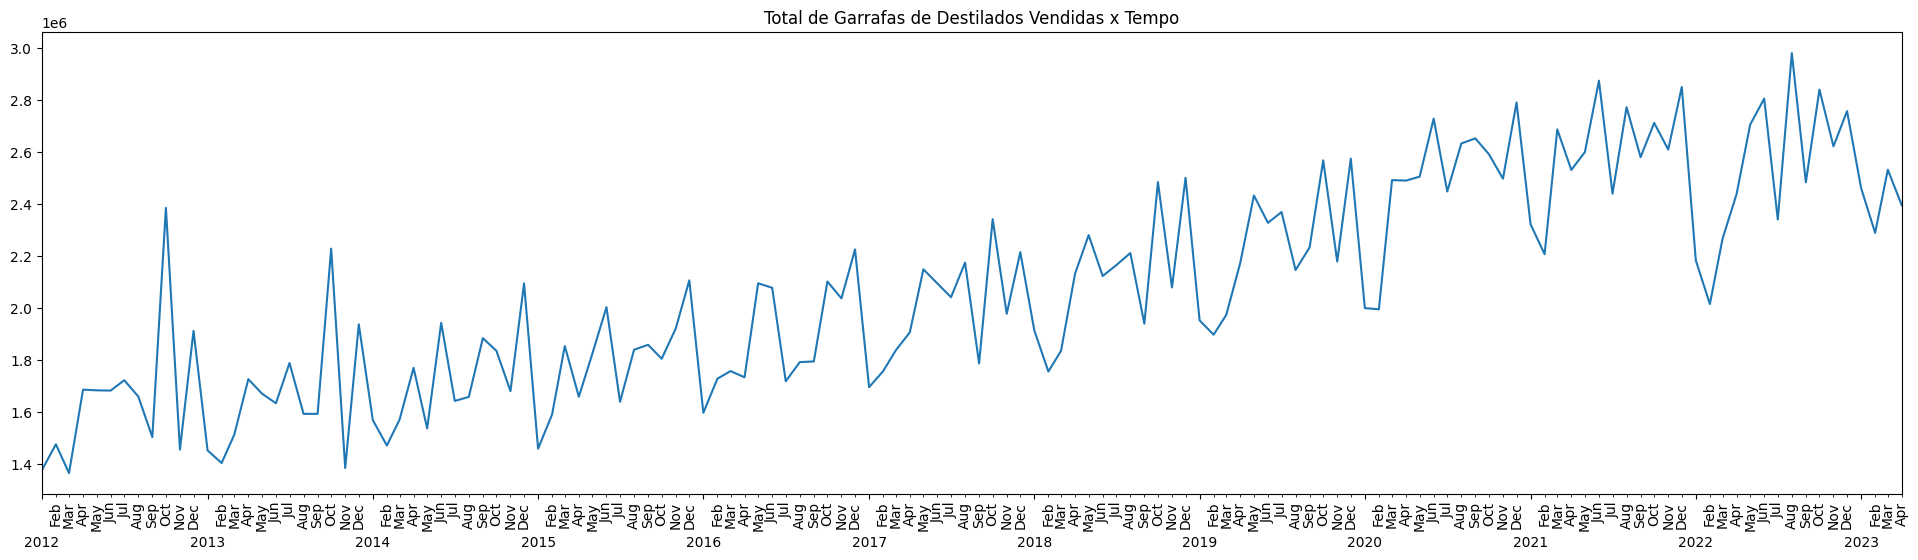

In [72]:
plt.plot(data_garrafas_vendidas['Date'], data_garrafas_vendidas['BottlesSold'])

ax = plt.gca()

ax.set_xlim([data_garrafas_vendidas['Date'].min().date(),
             data_garrafas_vendidas['Date'].max().date()])

xax = ax.get_xaxis()
xax.set_major_locator(matplotlib.dates.YearLocator())
xax.set_major_formatter(matplotlib.dates.DateFormatter("\n%Y"))

xax.set_minor_locator(matplotlib.dates.MonthLocator())
xax.set_minor_formatter(matplotlib.dates.DateFormatter("%b"))

xax.set_tick_params(which = 'major', pad = 15)

plt.setp(ax.xaxis.get_minorticklabels(), rotation = 90)
plt.setp(ax.get_xticklabels(), rotation = 0, ha = "center")

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(24, 6)

plt.title("Total de Garrafas de Destilados Vendidas x Tempo")

plt.show()

Pelo gráfico, é visivel o aumento no volume de garrafas vendidas de destilados no decorrer do ano, ao longo dos anos. Em um primeiro momento, é possível inferir que as vendas de bebidas no estado de Iowa, aumentam no decorrer do ano, com algumas oscilações, tendo seu pico entre os meses de Outubro e Dezembro. Essa época, coincide com o período de maiores festividades no país (Halloween, Ação de Graças, Natal e Ano Novo). O período de Abril à Junho, período da Primavera e inicio do Verão, também ocorre um volume considerável de vendas. O pico histórico de vendas, até o momento ocorreu em Agosto em 2022.

In [73]:
del(data_garrafas_vendidas)

### **Qual foi o total vendido por ano?**

In [74]:
total_ano = dados[['Date', 'BottlesSold', 'VolumeSold(Liters)', 'Sale(Dollars)']].copy()

In [75]:
total_ano['Ano'] = total_ano['Date'].dt.year
total_ano.drop('Date', axis = 1, inplace = True)
total_ano = total_ano.astype({'BottlesSold' : 'int',
                              'Sale(Dollars)' : 'float',
                              'VolumeSold(Liters)' : 'float'})

In [76]:
total_ano = total_ano.groupby(['Ano']).sum().reset_index()

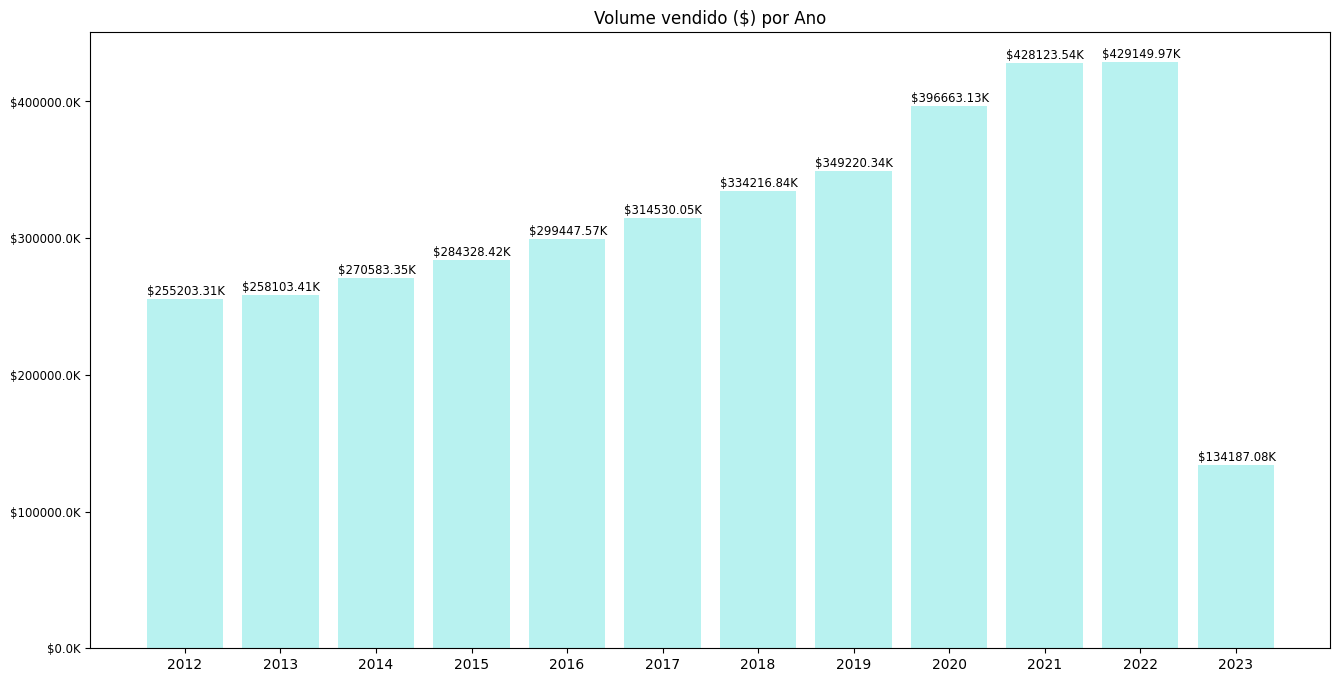

In [77]:
fig, ax = plt.subplots()

height = total_ano['Sale(Dollars)'] / 1000

bars = plt.bar(x = total_ano['Ano'], height = height, color = '#b8f2f0')

xlocs, xlabs = plt.xticks()

xlocs = [i for i in total_ano['Ano']]
xlabs = [i for i in total_ano['Ano']]

plt.xticks(xlocs, xlabs)
plt.yticks(fontsize = 'small')

ax.yaxis.set_major_formatter('${x:1.1f}K')

ax.yaxis.set_tick_params(which = 'major',
                         labelleft = True)

fig.set_size_inches(16, 8)

plt.title("Volume vendido ($) por Ano");

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 3000,  
             r'${0:.2f}K'.format(yval), rotation = 0,
             fontsize = 'small')

plt.show()

In [78]:
colunas = ['BottlesSold', 'VolumeSold(Liters)', 'Sale(Dollars)']

for i in colunas:
    if i == 'Sale(Dollars)':
        total_ano[i] = total_ano[i].apply(lambda x: "${:.1f}K".format((x/1000)))
    else:
        total_ano[i] = total_ano[i].apply(lambda x: "{:.1f}K".format((x/1000)))

In [79]:
total_ano

,Ano,BottlesSold,VolumeSold(Liters),Sale(Dollars)
0,2012,19917.4K,18755.3K,$255203.3K
1,2013,19934.7K,18576.5K,$258103.4K
2,2014,20666.0K,19157.7K,$270583.4K
3,2015,21572.4K,19617.7K,$284328.4K
4,2016,22670.3K,20300.3K,$299447.6K
5,2017,23990.0K,21096.9K,$314530.0K
6,2018,25435.0K,21896.0K,$334216.8K
7,2019,26844.3K,22301.5K,$349220.3K
8,2020,29841.3K,24211.7K,$396663.1K
9,2021,31203.5K,24755.4K,$428123.5K


In [80]:
del(total_ano)

### **Qual é o lucro por ano?**

In [81]:
lucro_ano = dados[['Date', 'BottlesSold', 'StateBottleCost', 'Sale(Dollars)']].copy()

lucro_ano['Ano'] = lucro_ano['Date'].dt.year
lucro_ano.drop('Date', axis = 1, inplace = True)
lucro_ano = lucro_ano.astype({'BottlesSold' : 'int',
                              'Sale(Dollars)' : 'float',
                              'StateBottleCost' : 'float'})
lucro_ano['custo_ABD'] = lucro_ano['StateBottleCost'] * lucro_ano['BottlesSold']
lucro_ano.drop(['BottlesSold', 'StateBottleCost'], axis = 1, inplace = True)

In [82]:
lucro_ano = lucro_ano.groupby('Ano').sum().reset_index()
lucro_ano['lucro_ABD'] = lucro_ano['Sale(Dollars)'] - lucro_ano['custo_ABD']

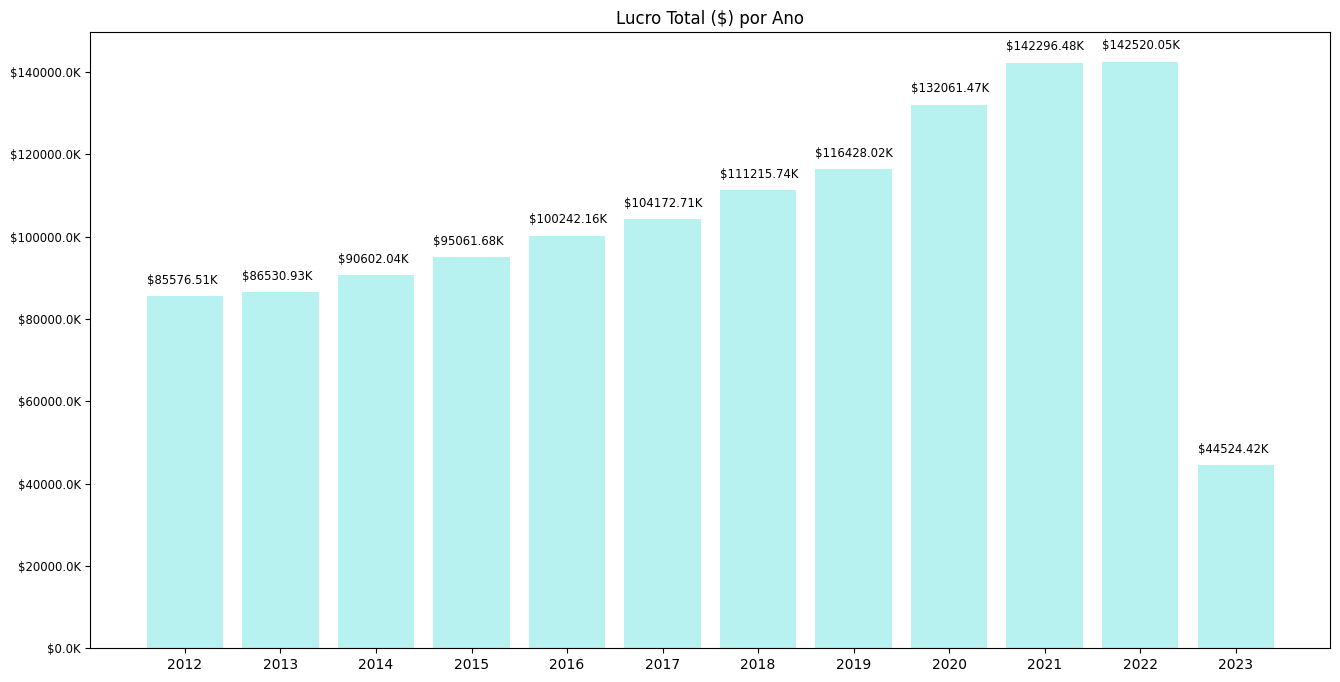

In [83]:
fig, ax = plt.subplots()

height = lucro_ano['lucro_ABD'] / 1000

bars = plt.bar(x = lucro_ano['Ano'], height = height, color = '#b8f2f0')

xlocs, xlabs = plt.xticks()

xlocs = [i for i in lucro_ano['Ano']]
xlabs = [i for i in lucro_ano['Ano']]

plt.xticks(xlocs, xlabs)
plt.yticks(fontsize = 'small')

ax.yaxis.set_major_formatter('${x:1.1f}K')

ax.yaxis.set_tick_params(which = 'major',
                         labelleft = True)

plt.title("Lucro Total ($) por Ano");

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 3000,  
             r'${0:.2f}K'.format(yval), rotation = 0,
             fontsize = 'small')

fig.set_size_inches(16, 8)

plt.show()

### **Qual foi a evolução do comportamento de consumo?** 

Considerando as respostas dos itens anteriores, e de que a o volume de compras feitas pelos estabelecimentos, em atacado, depende da demanda por esse tipo de produto no mercado. É fácil perceber uma evolução no consumo de álcool dentro do Estado, apresentando um crescimento, de cerca de 60% entre 2012 e 2023 (429150.0K / 255203.3K). 
Um ponto a se atentar é de que o maior crescimento no mercado de destilados no estado foi dado no mesmo ano em que a OMS declarou a COVID-19 como uma pandemia e orientou o isolamento. Ponto que é reforçado por estudos feitos pelo [NIAAA (National Institute on Alcohol Abuse and Alcoholism)](https://www.niaaa.nih.gov/news-events/research-update/deaths-involving-alcohol-increased-during-covid-19-pandemic), que identificou um aumento de mortes relacionadas a consumo de alcool nos Estados Unidos durante a pandemia.

## **Conclusão**

É vísivel o aumento no consumo de alcool dentro do estado de Iowa, podendo se tornarem problemas sociais e de saúde graves. Distribuidoras como Diegeo Americas e Sazerac Company Inc se favoreceram muito, em volume vendido, do aumento de consumo de bebida no estado, uma vez que a primeira se apresenta como a distribuidora que mais vendeu em todo período analisado, e a segunda a distribuidora que mais vendeu em 9 meses dos últimos 10 meses.

Vodkas americanas e Whiskies canadenses foram as categorias de bebidas mais procuradas, possuindo um enorme destaque das demais, sendo consideradas bebidas de alto teor alcólico. Por exemplo o Whisky Fireball Cinnamon e Whisky Black Velvet, que são marcas canadenses e foram os mais vendidos em todo período e também as categorias mais vendidas nos condados que mais venderam.

A cidade de Des Moines se apresenta como a cidade que possui a maior loja de vendas de bebidas do estado, e ao mesmo tempo, a cidade que mais possui lojas de bebida. Considerando o cenário em que a oferta acompanha a demanda por produtos, é razoável considerar que essa seja a cidade com maior consumo de alcool no estado.

Um fato identificado, que estrapola os limites da atividade de exploração executada com os dados aqui presentes, é o fato de parecer haver alguma relação entre momentos de crise ou estresse com o consumo de alcool, uma vez que o aumento no consumo de bebidas foi considerável no inicio da pandemia de COVID-19. Tendo em vista o estudo feito pela NIAAA e o propósito da ABD, é necessário atenção por parte da divisão, pois o comportamento de crescimento no consumo e mortes por consumo de alcool, pode apresentar relação na baixa efetividade de investimentos correlatos ao consumo.